# **P1. Networks Theory**
**Sansores Cruz Angel David\
Data Engineering\
Universidad Politécnica de Yucatán\
Ucú, Yucatán, México\
2109139@upy.edu.mx**

# **Instructions:**
1. Read completely this project assignment.
2. Choose a social network datasetyou are personally interested in. Here are some pages where you can find interesting network datasets1:
- a. Network Datasets used in Network Science (Barabasi, 2018): http://networksciencebook.com/translations/en/resources/data.html
- b. Pajek Datasets: http://vlado.fmf.uni-lj.si/pub/networks/data/
- c. Network Data Repository from the University of California: http://networkdata.ics.uci.edu/index.html
- d. Standford Large Network Dataset Collection: http://snap.stanford.edu/data/
- e. Network Data (Mark Newman): http://www-personal.umich.edu/~mejn/netdata/
- f. Konect, Networks: http://konect.uni-koblenz.de/networks/
- g. Network Data from Arizona State University: http://socialcomputing.asu.edu/pages/datasets
- h. 70 Online Datasets: https://www.technologyreview.com/s/421886/the-70-online-databases-that-define-our-planet/ \
**Do not choose small networks, e. g. Karate Club Network.**
3. Complete the following analysis:

# **A. Introduction**
The "football.gml" file typically represents a network of American football games between Division IA colleges during a regular season. This network is often used to demonstrate community detection algorithms because of its well-defined community structures based on conferences.

**Importance and Applications**
This network is crucial for understanding how communities (conferences) interact within sports leagues, which can have implications for scheduling, marketing, broadcasting rights, and fan engagement strategies.

**Classification**
The network is typically undirected because games are mutual engagements between two teams. It's non-planar due to multiple edges crossing when visualized and it’s not bipartite as there are not two distinct sets of nodes with edges only between sets.

**Visualization**
We'll visualize the network to confirm its characteristics and observe its structure.

# **B. Network Characteristics**
We will calculate basic network characteristics such as size, number of links, average path length, clustering coefficient, and various distance metrics like average distance, diameter, eccentricity, radius, periphery, and center.

In [1]:
import networkx as nx

# Load the GML file
G = nx.read_gml('football.gml')

# Calculating network characteristics
network_size = G.number_of_nodes()
number_of_links = G.number_of_edges()
average_clustering_coefficient = nx.average_clustering(G)
average_path_length = nx.average_shortest_path_length(G)

# Distance metrics
diameter = nx.diameter(G)
radius = nx.radius(G)
eccentricities = nx.eccentricity(G)
periphery = list(nx.periphery(G))
center = list(nx.center(G))

print("Network Size:", network_size)
print("Number of Links:", number_of_links)
print("Average Clustering Coefficient:", average_clustering_coefficient)
print("Average Path Length:", average_path_length)
print("Diameter:", diameter)
print("Radius:", radius)
print("Eccentricity (Sample):", dict(list(eccentricities.items())[:5]))  # Sample output
print("Periphery (Sample):", periphery[:5])  # Sample output
print("Center (Sample):", center[:5])  # Sample output


Network Size: 115
Number of Links: 613
Average Clustering Coefficient: 0.40321601104209814
Average Path Length: 2.5081617086193746
Diameter: 4
Radius: 3
Eccentricity (Sample): {'BrighamYoung': 3, 'FloridaState': 4, 'Iowa': 4, 'KansasState': 3, 'NewMexico': 4}
Periphery (Sample): ['FloridaState', 'Iowa', 'NewMexico', 'TexasTech', 'SouthernCalifornia']
Center (Sample): ['BrighamYoung', 'KansasState', 'PennState', 'Northwestern', 'Wisconsin']


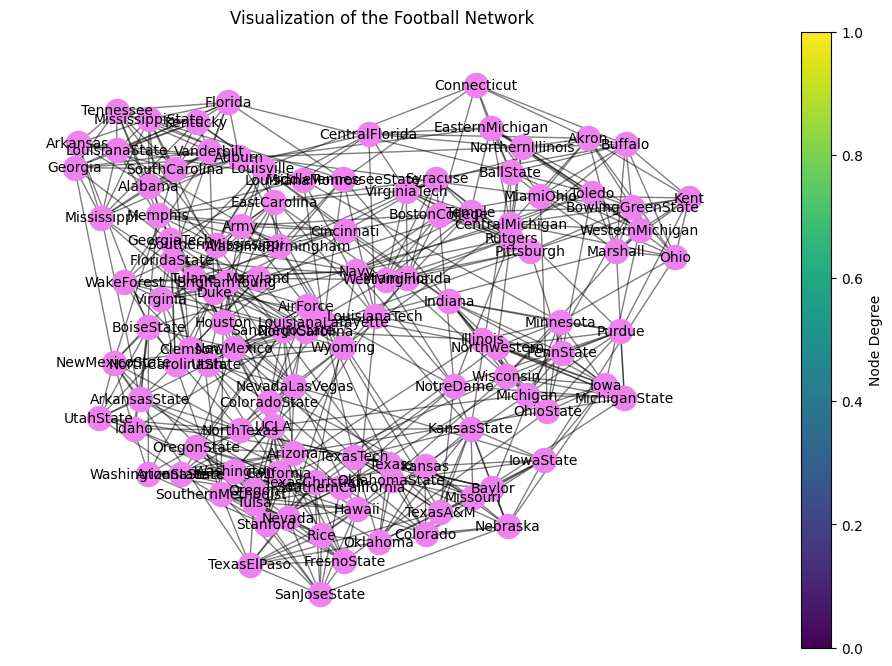

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the network (replace 'path_to_football.gml' with the actual path to your file)
G = nx.read_gml('football.gml')

# Position nodes using the Spring layout for aesthetic purposes
pos = nx.spring_layout(G)

# Draw the network
plt.figure(figsize=(12, 8))
nx.draw_networkx_edges(G, pos, alpha=0.5)  # Draw edges with half transparency
nodes = nx.draw_networkx_nodes(G, pos, node_size=300, node_color='violet', cmap=plt.cm.Blues)  # Nodes are colored in sky blue
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')  # Node labels are in black

plt.title('Visualization of the Football Network')
plt.colorbar(nodes, label='Node Degree')  # Adds a colorbar indicating the node degree
plt.axis('off')  # Turn off the axis to make it look cleaner
plt.show()


# **C. Centrality Measure**
Next, let's analyze the network based on centrality measures. We will focus on Degree Centrality and Betweenness Centrality to understand the most influential teams in terms of connections and control over the game flow within the network.

To represent the centrality measures from Part C in a more digestible format, we'll use pandas for a table and matplotlib for a graph.


**a. Code to Display Centrality Measures in a Table:**

In [3]:
import pandas as pd
import networkx as nx

# Assuming G is the loaded network
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Create a DataFrame to hold the centrality data
centrality_df = pd.DataFrame({
    "Node": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values())
})

# Display the DataFrame
print(centrality_df.head())  # Display only the first few rows for brevity


           Node  Degree Centrality  Betweenness Centrality
0  BrighamYoung           0.105263                0.032490
1  FloridaState           0.105263                0.017621
2          Iowa           0.105263                0.013122
3   KansasState           0.105263                0.023070
4     NewMexico           0.096491                0.010664


**b. Code to Plot Centrality Measures:**

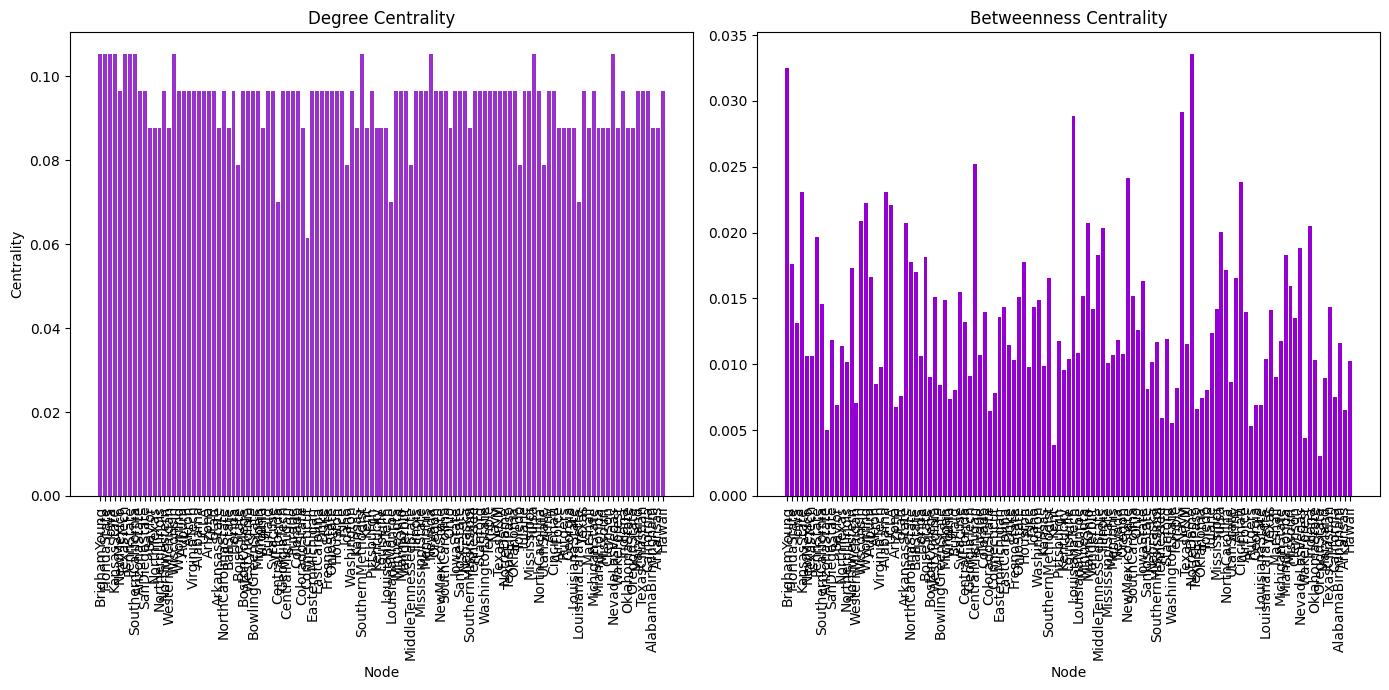

In [15]:
import matplotlib.pyplot as plt

# Plotting both centrality measures
plt.figure(figsize=(14, 7))

# Degree Centrality
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(range(len(degree_centrality)), list(degree_centrality.values()), color='darkorchid')
plt.xticks(range(len(degree_centrality)), list(degree_centrality.keys()), rotation=90)
plt.title('Degree Centrality')
plt.xlabel('Node')
plt.ylabel('Centrality')

# Betweenness Centrality
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(range(len(betweenness_centrality)), list(betweenness_centrality.values()), color='darkviolet')
plt.xticks(range(len(betweenness_centrality)), list(betweenness_centrality.keys()), rotation=90)
plt.title('Betweenness Centrality')
plt.xlabel('Node')

plt.tight_layout()
plt.show()


# **D. Degree Distribution**
Let's plot the degree distribution of the network to observe the connectivity pattern across different nodes (teams). ​

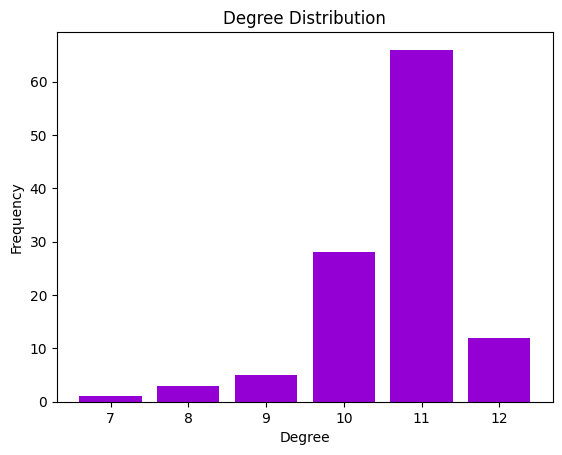

In [14]:
import matplotlib.pyplot as plt

# Degree distribution
degrees = [G.degree(n) for n in G.nodes()]
degree_count = {}
for degree in degrees:
    if degree not in degree_count:
        degree_count[degree] = 0
    degree_count[degree] += 1

# Plotting
plt.figure()
plt.bar(degree_count.keys(), degree_count.values(), color='darkviolet')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


# **E. Community Detection**
Now, let's perform community detection to uncover the structure of conferences within the football network. We'll visualize the communities afterwards to provide insights into how teams are grouped. ​

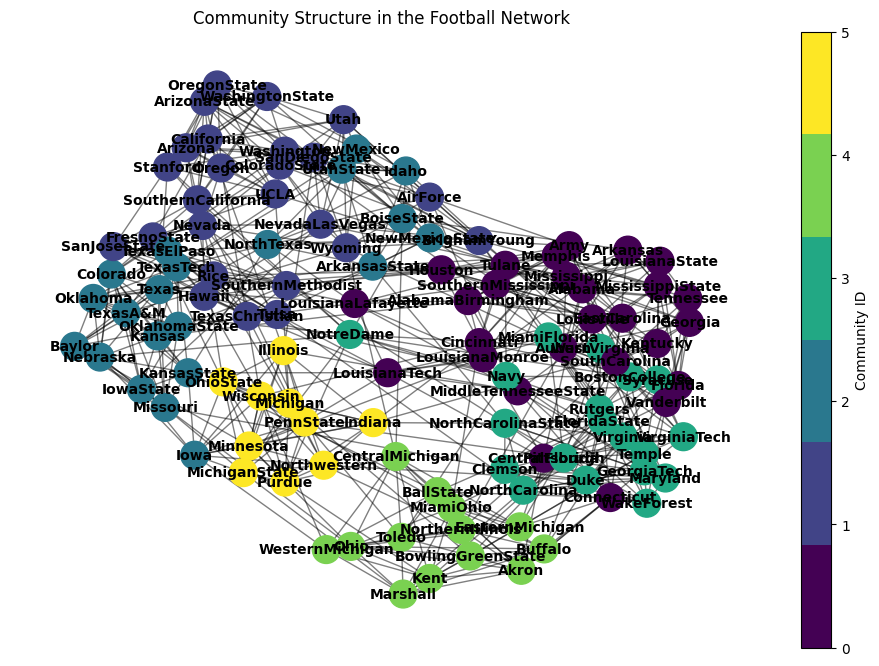

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm

# Load the network if not already loaded
G = nx.read_gml('football.gml')

# Community detection using a modularity-based algorithm
communities = nx_comm.greedy_modularity_communities(G)
community_map = {node: cid for cid, community in enumerate(communities) for node in community}

# Generate a color map from a specified color palette
color_map = plt.cm.get_cmap('viridis', max(community_map.values()) + 1)  # Change 'viridis' to any other colormap

# Position nodes using the Spring layout
pos = nx.spring_layout(G)

# Start plotting
plt.figure(figsize=(12, 8))
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw nodes with custom colors
nodes = nx.draw_networkx_nodes(G, pos, node_size=400, 
                               node_color=[community_map[node] for node in G.nodes()], 
                               cmap=color_map)

# Draw labels with bold font
labels = nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='bold')

plt.title('Community Structure in the Football Network')
plt.colorbar(nodes, label='Community ID')  # Adds a colorbar with labels
plt.axis('off')  # Turn off the axis
plt.show()
